In [1]:
from sklearn.decomposition import PCA
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("C:/Users/Roshni/OneDrive/Desktop/Sem7/Project 1/physionet spectro/PhysioNet-PCG-ImageFeatures.csv")
df

,patientid,energy,statistics_energy,kurtosis,maximum,minimum,mean,mean_deviation,median,img_range,...,imc2,idmn,idn,inverse_variance,maximum_probability,sum_average,sum_entropy,sum_varianc,variance.1,HYPOTHESIS
0,e01661,14096328,2.070000e+11,1.164467,255,0,149.440368,117.348702,255,255,...,0.698198,0.902554,0.878740,0.026416,0.625243,18.036460,1.677938,299.260348,94.838742,-1
1,a0122,5756791,3.508266e+10,1.149228,255,0,149.781019,118.821733,255,255,...,0.599783,0.903181,0.881726,0.030142,0.631226,17.975607,1.654042,299.968422,94.824249,-1
2,b0022,13859401,2.070000e+11,1.168703,255,0,149.913443,117.430662,255,255,...,0.696438,0.902344,0.879477,0.026135,0.626256,18.075714,1.673771,300.354564,95.023116,-1
3,e01846,13573243,1.970000e+11,1.189315,255,0,150.615798,116.124833,255,255,...,0.744144,0.903104,0.878379,0.024142,0.624557,18.109670,1.668156,300.674627,95.085496,-1
4,a0320,4365269,3.662849e+10,1.156185,255,0,150.118612,119.181668,255,255,...,0.608799,0.898177,0.878095,0.020102,0.642330,18.306196,1.507210,311.686159,96.625613,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3235,e00572,14570919,1.970000e+11,1.187961,255,0,150.835780,116.266456,255,255,...,0.741029,0.903743,0.879461,0.026624,0.623884,18.078773,1.706188,299.014988,94.910106,1
3236,e00214,13103016,2.150000e+11,1.158585,255,0,149.209891,117.967900,255,255,...,0.671326,0.900854,0.878392,0.023878,0.626397,18.064612,1.639206,301.226450,95.060359,1
3237,e00200,12914430,2.210000e+11,1.146299,255,0,148.600780,118.666931,255,255,...,0.664847,0.899625,0.878273,0.023454,0.626777,18.044109,1.623775,301.438278,95.011709,1
3238,e00566,14112484,1.780000e+11,1.253403,255,0,154.022398,113.506337,255,255,...,0.825000,0.903545,0.878261,0.023997,0.622184,18.275741,1.674930,303.210042,95.589052,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3240 entries, 0 to 3239
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   patientid            3240 non-null   object 
 1   energy               3240 non-null   int64  
 2   statistics_energy    3240 non-null   float64
 3   kurtosis             3240 non-null   float64
 4   maximum              3240 non-null   int64  
 5   minimum              3240 non-null   int64  
 6   mean                 3240 non-null   float64
 7   mean_deviation       3240 non-null   float64
 8   median               3240 non-null   int64  
 9   img_range            3240 non-null   int64  
 10  rms                  3240 non-null   float64
 11  skewness             3240 non-null   float64
 12  std                  3240 non-null   float64
 13  variance             3240 non-null   float64
 14  entropy              3240 non-null   float64
 15  uniformity           3240 non-null   f

In [34]:
accuracies_with_PCA_axes=[]
accuracies_combined=[]
only_dataset=[]

X=df.iloc[:,1:-1]
y=df[['HYPOTHESIS']]
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=1)
clf=AdaBoostClassifier(random_state=96,base_estimator=RandomForestClassifier(random_state=101),n_estimators=100,learning_rate=0.01)
clf.fit(X_train,y_train.values.ravel())

for i in range(1,37):
    only_dataset.append(clf.score(X_test,y_test))

for i in range(1,37):
    print("ITERATION "+str(i+1))
    X=df.iloc[:,1:-1]
    y=df[['HYPOTHESIS']]
    pca=PCA(n_components=i)
    X_PCA=pca.fit_transform(X)
    X_PCA=pd.DataFrame(X_PCA)
    FINAL_X_SET = pd.concat([X, X_PCA], axis=1, join='inner')
    
    X_train, X_test, y_train, y_test = train_test_split(FINAL_X_SET, y, test_size = 0.2, random_state = 1)
    clf=AdaBoostClassifier(random_state=96,base_estimator=RandomForestClassifier(random_state=101),n_estimators=100,learning_rate=0.01)
    clf.fit(X_train, y_train.values.ravel()) 
    accuracies_combined.append(clf.score(X_test,y_test))
    X_train,X_test,y_train,y_test=train_test_split(X_PCA, y, test_size=0.2, random_state=1)
    clf=AdaBoostClassifier(random_state=96,base_estimator=RandomForestClassifier(random_state=101),n_estimators=100,learning_rate=0.01)
    clf.fit(X_train,y_train.values.ravel())
    accuracies_with_PCA_axes.append(clf.score(X_test,y_test))

ITERATION 2


C:\Users\Roshni\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Roshni\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


ITERATION 3


C:\Users\Roshni\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Roshni\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


ITERATION 4


C:\Users\Roshni\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Roshni\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


ITERATION 5


C:\Users\Roshni\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Roshni\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


ITERATION 6


C:\Users\Roshni\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Roshni\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


ITERATION 7


C:\Users\Roshni\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Roshni\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


ITERATION 8


C:\Users\Roshni\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Roshni\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


ITERATION 9


C:\Users\Roshni\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Roshni\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


ITERATION 10


C:\Users\Roshni\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Roshni\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


ITERATION 11


C:\Users\Roshni\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Roshni\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


ITERATION 12


C:\Users\Roshni\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Roshni\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


ITERATION 13


C:\Users\Roshni\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Roshni\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


ITERATION 14


C:\Users\Roshni\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Roshni\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


ITERATION 15


C:\Users\Roshni\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Roshni\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


ITERATION 16


C:\Users\Roshni\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Roshni\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


ITERATION 17


C:\Users\Roshni\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Roshni\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


ITERATION 18


C:\Users\Roshni\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Roshni\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


ITERATION 19


C:\Users\Roshni\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Roshni\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


ITERATION 20


C:\Users\Roshni\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Roshni\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


ITERATION 21


C:\Users\Roshni\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Roshni\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


ITERATION 22


C:\Users\Roshni\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Roshni\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


ITERATION 23


C:\Users\Roshni\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Roshni\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


ITERATION 24


C:\Users\Roshni\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Roshni\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


ITERATION 25


C:\Users\Roshni\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Roshni\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


ITERATION 26


C:\Users\Roshni\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Roshni\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


ITERATION 27


C:\Users\Roshni\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Roshni\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


ITERATION 28


C:\Users\Roshni\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Roshni\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


ITERATION 29


C:\Users\Roshni\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Roshni\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


ITERATION 30


C:\Users\Roshni\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Roshni\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


ITERATION 31


C:\Users\Roshni\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Roshni\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


ITERATION 32


C:\Users\Roshni\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Roshni\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


ITERATION 33


C:\Users\Roshni\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Roshni\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


ITERATION 34


C:\Users\Roshni\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Roshni\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


ITERATION 35


C:\Users\Roshni\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Roshni\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


ITERATION 36


C:\Users\Roshni\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Roshni\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


ITERATION 37


C:\Users\Roshni\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Roshni\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


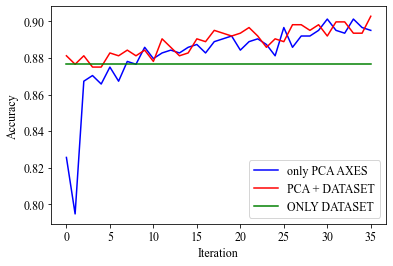

In [36]:
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['font.size'] = 12
csfont = {'fontname':'Times New Roman'}
plt.plot(accuracies_with_PCA_axes,color='b',label='only PCA AXES')
plt.plot(accuracies_combined, color='r',label='PCA + DATASET')
plt.plot(only_dataset,color='g',label='ONLY DATASET')
plt.legend()
plt.xlabel('Iteration',**csfont)
plt.ylabel('Accuracy',**csfont)
plt.savefig("Image_Features_PCG.png")
plt.show()

In [69]:
df

,patientid,energy,statistics_energy,kurtosis,maximum,minimum,mean,mean_deviation,median,img_range,...,imc2,idmn,idn,inverse_variance,maximum_probability,sum_average,sum_entropy,sum_varianc,variance.1,HYPOTHESIS
0,e01661,14096328,2.070000e+11,1.164467,255,0,149.440368,117.348702,255,255,...,0.698198,0.902554,0.878740,0.026416,0.625243,18.036460,1.677938,299.260348,94.838742,-1
1,a0122,5756791,3.508266e+10,1.149228,255,0,149.781019,118.821733,255,255,...,0.599783,0.903181,0.881726,0.030142,0.631226,17.975607,1.654042,299.968422,94.824249,-1
2,b0022,13859401,2.070000e+11,1.168703,255,0,149.913443,117.430662,255,255,...,0.696438,0.902344,0.879477,0.026135,0.626256,18.075714,1.673771,300.354564,95.023116,-1
3,e01846,13573243,1.970000e+11,1.189315,255,0,150.615798,116.124833,255,255,...,0.744144,0.903104,0.878379,0.024142,0.624557,18.109670,1.668156,300.674627,95.085496,-1
4,a0320,4365269,3.662849e+10,1.156185,255,0,150.118612,119.181668,255,255,...,0.608799,0.898177,0.878095,0.020102,0.642330,18.306196,1.507210,311.686159,96.625613,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3235,e00572,14570919,1.970000e+11,1.187961,255,0,150.835780,116.266456,255,255,...,0.741029,0.903743,0.879461,0.026624,0.623884,18.078773,1.706188,299.014988,94.910106,1
3236,e00214,13103016,2.150000e+11,1.158585,255,0,149.209891,117.967900,255,255,...,0.671326,0.900854,0.878392,0.023878,0.626397,18.064612,1.639206,301.226450,95.060359,1
3237,e00200,12914430,2.210000e+11,1.146299,255,0,148.600780,118.666931,255,255,...,0.664847,0.899625,0.878273,0.023454,0.626777,18.044109,1.623775,301.438278,95.011709,1
3238,e00566,14112484,1.780000e+11,1.253403,255,0,154.022398,113.506337,255,255,...,0.825000,0.903545,0.878261,0.023997,0.622184,18.275741,1.674930,303.210042,95.589052,1


In [100]:
X=df.iloc[:,1:-1]
X

,energy,statistics_energy,kurtosis,maximum,minimum,mean,mean_deviation,median,img_range,rms,...,imc1,imc2,idmn,idn,inverse_variance,maximum_probability,sum_average,sum_entropy,sum_varianc,variance.1
0,14096328,2.070000e+11,1.164467,255,0,149.440368,117.348702,255,255,3.386978,...,-0.356743,0.698198,0.902554,0.878740,0.026416,0.625243,18.036460,1.677938,299.260348,94.838742
1,5756791,3.508266e+10,1.149228,255,0,149.781019,118.821733,255,255,3.401121,...,-0.296338,0.599783,0.903181,0.881726,0.030142,0.631226,17.975607,1.654042,299.968422,94.824249
2,13859401,2.070000e+11,1.168703,255,0,149.913443,117.430662,255,255,3.358394,...,-0.363127,0.696438,0.902344,0.879477,0.026135,0.626256,18.075714,1.673771,300.354564,95.023116
3,13573243,1.970000e+11,1.189315,255,0,150.615798,116.124833,255,255,3.323542,...,-0.391104,0.744144,0.903104,0.878379,0.024142,0.624557,18.109670,1.668156,300.674627,95.085496
4,4365269,3.662849e+10,1.156185,255,0,150.118612,119.181668,255,255,2.961675,...,-0.303360,0.608799,0.898177,0.878095,0.020102,0.642330,18.306196,1.507210,311.686159,96.625613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3235,14570919,1.970000e+11,1.187961,255,0,150.835780,116.266456,255,255,3.443522,...,-0.392216,0.741029,0.903743,0.879461,0.026624,0.623884,18.078773,1.706188,299.014988,94.910106
3236,13103016,2.150000e+11,1.158585,255,0,149.209891,117.967900,255,255,3.265465,...,-0.342972,0.671326,0.900854,0.878392,0.023878,0.626397,18.064612,1.639206,301.226450,95.060359
3237,12914430,2.210000e+11,1.146299,255,0,148.600780,118.666931,255,255,3.241881,...,-0.338133,0.664847,0.899625,0.878273,0.023454,0.626777,18.044109,1.623775,301.438278,95.011709
3238,14112484,1.780000e+11,1.253403,255,0,154.022398,113.506337,255,255,3.388919,...,-0.468327,0.825000,0.903545,0.878261,0.023997,0.622184,18.275741,1.674930,303.210042,95.589052


In [101]:
df_min_max_scaled = X
  
for column in df_min_max_scaled.columns:
    df_min_max_scaled[column] = ((df_min_max_scaled[column] - df_min_max_scaled[column].min())) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())    
  
df_min_max_scaled.head()

,energy,statistics_energy,kurtosis,maximum,minimum,mean,mean_deviation,median,img_range,rms,...,imc1,imc2,idmn,idn,inverse_variance,maximum_probability,sum_average,sum_entropy,sum_varianc,variance.1
0,0.861327,0.739775,0.276290,NaN,NaN,0.298610,0.526440,NaN,NaN,0.822848,...,0.592281,0.585547,0.614940,0.436165,0.549178,0.112373,0.242410,0.885271,0.108054,0.187416
1,0.192122,0.029662,0.228647,NaN,NaN,0.317524,0.647607,NaN,NaN,0.835276,...,0.846544,0.314072,0.653534,0.749143,0.691949,0.280154,0.181031,0.837549,0.133114,0.184223
2,0.842315,0.739775,0.289534,NaN,NaN,0.324877,0.533181,NaN,NaN,0.797732,...,0.565409,0.580694,0.601961,0.513437,0.538443,0.140795,0.282003,0.876948,0.146781,0.228037
3,0.819352,0.698470,0.353971,NaN,NaN,0.363876,0.425767,NaN,NaN,0.767108,...,0.447642,0.712288,0.648778,0.398361,0.462067,0.093133,0.316253,0.865735,0.158108,0.241780
4,0.080459,0.036047,0.250396,NaN,NaN,0.336269,0.677215,NaN,NaN,0.449141,...,0.816985,0.338940,0.345265,0.368547,0.307265,0.591566,0.514479,0.544325,0.547828,0.581093


In [102]:
# df_min_max_scaled.info()

In [103]:
X = df_min_max_scaled
X = X.drop(['maximum', 'minimum', 'median', 'img_range'], axis = 1)

In [104]:
X

,energy,statistics_energy,kurtosis,mean,mean_deviation,rms,skewness,std,variance,entropy,...,imc1,imc2,idmn,idn,inverse_variance,maximum_probability,sum_average,sum_entropy,sum_varianc,variance.1
0,0.861327,0.739775,0.276290,0.298610,0.526440,0.822848,0.766168,0.439110,0.432012,0.647626,...,0.592281,0.585547,0.614940,0.436165,0.549178,0.112373,0.242410,0.885271,0.108054,0.187416
1,0.192122,0.029662,0.228647,0.317524,0.647607,0.835276,0.750256,0.568495,0.561425,0.497126,...,0.846544,0.314072,0.653534,0.749143,0.691949,0.280154,0.181031,0.837549,0.133114,0.184223
2,0.842315,0.739775,0.289534,0.324877,0.533181,0.797732,0.732021,0.454570,0.447424,0.659366,...,0.565409,0.580694,0.601961,0.513437,0.538443,0.140795,0.282003,0.876948,0.146781,0.228037
3,0.819352,0.698470,0.353971,0.363876,0.425767,0.767108,0.699666,0.339145,0.332685,0.720926,...,0.447642,0.712288,0.648778,0.398361,0.462067,0.093133,0.316253,0.865735,0.158108,0.241780
4,0.080459,0.036047,0.250396,0.336269,0.677215,0.449141,0.698024,0.651383,0.644838,0.400435,...,0.816985,0.338940,0.345265,0.368547,0.307265,0.591566,0.514479,0.544325,0.547828,0.581093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3235,0.899411,0.698470,0.349739,0.376090,0.437417,0.872532,0.689613,0.345349,0.338833,0.758180,...,0.442965,0.703697,0.688179,0.511721,0.557166,0.074255,0.285089,0.941686,0.099370,0.203139
3236,0.781619,0.772820,0.257900,0.285812,0.577373,0.716077,0.765196,0.510836,0.503634,0.571953,...,0.650247,0.511421,0.510184,0.399684,0.451935,0.144753,0.270805,0.807923,0.177638,0.236242
3237,0.766486,0.797603,0.219489,0.251991,0.634874,0.695353,0.790143,0.579760,0.572738,0.534591,...,0.670616,0.493550,0.434460,0.387269,0.435715,0.155406,0.250125,0.777107,0.185136,0.225524
3238,0.862624,0.619989,0.554329,0.553028,0.210376,0.824553,0.495009,0.134028,0.130683,0.949351,...,0.122586,0.935328,0.675946,0.385913,0.456494,0.026580,0.483760,0.879264,0.247842,0.352722


In [105]:
from sklearn.metrics import confusion_matrix
def sens_spec(y_test, y_pred):
    cm1 = confusion_matrix(y_test, y_pred)
    print(cm1)
    total1=sum(sum(cm1))
    accuracy1=(cm1[0,0]+cm1[1,1])/total1
    print ('Accuracy : ', accuracy1)

    sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    print('Sensitivity : ', sensitivity1 )

    specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    print('Specificity : ', specificity1)

In [106]:
y=df[['HYPOTHESIS']]
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=1)
clf=AdaBoostClassifier(base_estimator=RandomForestClassifier(random_state=2),n_estimators=100,learning_rate=0.01)
clf.fit(X_train,y_train)

C:\Users\Roshni\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(base_estimator=RandomForestClassifier(random_state=2),
                   learning_rate=0.01, n_estimators=100)

In [107]:

y_pred = clf.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_pred, y_test))
sens_spec(y_test, y_pred)

              precision    recall  f1-score   support

          -1       0.64      0.76      0.69       118
           1       0.94      0.90      0.92       530

    accuracy                           0.88       648
   macro avg       0.79      0.83      0.81       648
weighted avg       0.89      0.88      0.88       648

[[ 90  51]
 [ 28 479]]
Accuracy :  0.8780864197530864
Sensitivity :  0.6382978723404256
Specificity :  0.9447731755424064


In [81]:
len(X.columns)

32

In [82]:
clf.score(X_test, y_test)

0.8811728395061729

In [83]:
import pickle as pkl
pkl.dump(clf, open("rfcboostingImgFeatures.pkl", "wb"))

In [108]:
X=df.iloc[:,1:-1]
y=df[['HYPOTHESIS']]
pca=PCA(n_components=36)
X_PCA=pca.fit_transform(X)
X_PCA=pd.DataFrame(X_PCA)
FINAL_X_SET = pd.concat([X, X_PCA], axis=1, join='inner')
    
X_train, X_test, y_train, y_test = train_test_split(FINAL_X_SET, y, test_size = 0.2, random_state = 1)
clf=AdaBoostClassifier(random_state=96,base_estimator=RandomForestClassifier(random_state=101),n_estimators=100,learning_rate=0.01)
clf.fit(X_train, y_train.values.ravel()) 

C:\Users\Roshni\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


AdaBoostClassifier(base_estimator=RandomForestClassifier(random_state=101),
                   learning_rate=0.01, n_estimators=100, random_state=96)

In [109]:
clf.score(X_test, y_test)

C:\Users\Roshni\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


0.9027777777777778

In [110]:
y_pred = clf.predict(X_test)
print(classification_report(y_pred, y_test))
sens_spec(y_test, y_pred)

              precision    recall  f1-score   support

          -1       0.69      0.84      0.75       116
           1       0.96      0.92      0.94       532

    accuracy                           0.90       648
   macro avg       0.83      0.88      0.85       648
weighted avg       0.91      0.90      0.91       648

[[ 97  44]
 [ 19 488]]
Accuracy :  0.9027777777777778
Sensitivity :  0.6879432624113475
Specificity :  0.9625246548323472


C:\Users\Roshni\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [88]:
X=df.iloc[:,1:-1]
y=df[['HYPOTHESIS']]
pca=PCA(n_components=36)
X_PCA=pca.fit_transform(X)
FINAL_X_SET=pd.DataFrame(X_PCA)
    
X_train, X_test, y_train, y_test = train_test_split(FINAL_X_SET, y, test_size = 0.2, random_state = 1)
clf=AdaBoostClassifier(random_state=96,base_estimator=RandomForestClassifier(random_state=101),n_estimators=100,learning_rate=0.01)
clf.fit(X_train, y_train.values.ravel()) 
y_pred = clf.predict(X_test)
print(classification_report(y_pred, y_test))
sens_spec(y_test, y_pred)

              precision    recall  f1-score   support

          -1       0.66      0.82      0.73       113
           1       0.96      0.91      0.93       535

    accuracy                           0.90       648
   macro avg       0.81      0.87      0.83       648
weighted avg       0.91      0.90      0.90       648



In [89]:
clf.score(X_test, y_test)

0.8950617283950617

array([[ 93,  48],
       [ 20, 487]], dtype=int64)